In [5]:
!uv pip install gensim

Using Python 3.10.18 environment at: C:\Users\hayk_\.conda\envs\lectures
Resolved 5 packages in 437ms
error: failed to remove file `C:\Users\hayk_\.conda\envs\lectures\Lib\site-packages\numpy.libs/libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll`: Access is denied. (os error 5)


In [43]:
import gensim.downloader as api

# Load a smaller pre-trained model (this might take a few minutes first time)
print("Loading GloVe (Global Vectors for Word Representation) model...")
# model = api.load("glove-wiki-gigaword-50")  # 50-dimensional vectors

model = api.load("glove-wiki-gigaword-300")  # 50-dimensional vectors

print("Model loaded successfully!")

# Get vector for a word
word = "cheese"
if word in model:
    vector = model[word]
    print(f"Vector for '{word}' has shape: {vector.shape}")
    print(f"First 10 dimensions: {vector[:10]}")
else:
    print(f"'{word}' not found in vocabulary")
    

potential_words = ["elephant", "cheese", "butter", "bread", "watermelon", "potato", 
                   "iron", "clock", "computer"]


Loading GloVe (Global Vectors for Word Representation) model...
[===========---------------------------------------] 23.2% 87.2/376.1MB downloaded

KeyboardInterrupt: 

In [27]:
word = "cheese"
# calc cosine similarity by hand

def cosine_similarity(vec1, vec2):
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    magnitude1 = sum(a ** 2 for a in vec1) ** 0.5
    magnitude2 = sum(b ** 2 for b in vec2) ** 0.5
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0
    return dot_product / (magnitude1 * magnitude2)


print(word)
# Get the vector for the target word
target_vector = model[word]

# Calculate similarities
similarities = {}
for potential_word in potential_words:
    if potential_word in model:
        potential_vector = model[potential_word]
        similarities[potential_word] = cosine_similarity(target_vector, potential_vector)

# Sort by similarity
sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

# Display results
print("Cosine similarities (manual calculation):")
for w, similarity in sorted_similarities:
    print(f" - {w}: {similarity:.4f}")


cheese
Cosine similarities (manual calculation):
 - cheese: 1.0000
 - butter: 0.8424
 - bread: 0.8100
 - potato: 0.7867
 - watermelon: 0.6214
 - iron: 0.3547
 - elephant: 0.1190
 - computer: 0.1123
 - clock: 0.0350


In [41]:
LHS1 = "cowboy" # LHS = Left Hand Side
LHS2 = "man"

x = model[LHS1] - model[LHS2]
x

array([-1.9294139 , -0.19274001, -0.90955997,  0.22201999, -1.51231   ,
       -0.53681   , -0.73476994, -1.51821   ,  0.078116  ,  0.31917   ,
       -0.1746    , -0.21008101,  1.02303   , -0.05034995, -0.16585001,
        0.550022  ,  0.38555998,  0.04446   ,  0.26323998, -0.5655    ,
        0.04589003, -0.60077995, -0.699981  ,  0.02098   , -0.5189    ,
        1.639     , -0.5500501 ,  0.14113998,  0.29915   , -0.72900003,
       -1.7907001 ,  0.255368  , -0.43032998,  0.47446   , -0.17554998,
        0.30225   , -0.46791   , -0.72302395, -0.83008003,  0.30623   ,
       -0.26573598,  0.38761002, -0.49359003,  0.05006   , -0.35476997,
        0.02950996,  0.92459   , -0.05765003, -1.0768499 ,  0.3133    ],
      dtype=float32)

In [42]:
# vector most similar to vector x
vec = model.similar_by_vector(x, topn=16)

vec

[('roycroft', 0.7122161984443665),
 ('rtw', 0.7076272368431091),
 ('geg', 0.6716516017913818),
 ('2007-10', 0.6595117449760437),
 ('icewine', 0.650711715221405),
 ('yodeling', 0.6492490768432617),
 ('seasonals', 0.6462990045547485),
 ('wakarusa', 0.6414165496826172),
 ('auskick', 0.6393561959266663),
 ('silambam', 0.6348974704742432),
 ('paniolo', 0.6314845681190491),
 ('p-51b', 0.6287087798118591),
 ('cowgirls', 0.6269602179527283),
 ('walgett', 0.6264983415603638),
 ('hand-woven', 0.6242163777351379),
 ('ccca', 0.6221911311149597)]

In [9]:
# verification
model.most_similar("cheese", topn=5)


[('salad', 0.9663354754447937),
 ('fries', 0.9657281041145325),
 ('chicken', 0.9655250906944275),
 ('peanut', 0.9608643054962158),
 ('butter', 0.9571344256401062)]

# Knn

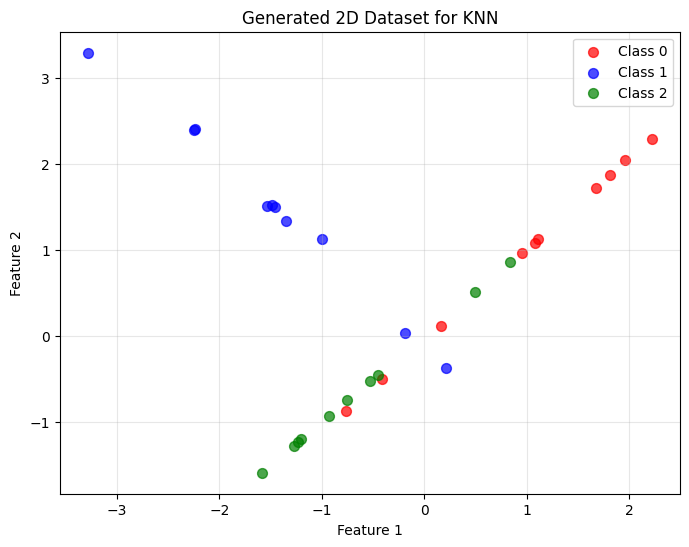

In [53]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate 2D dataset for KNN
X_sklearn, y_sklearn = make_classification(
    n_samples=30,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=509
)

# Plot the generated dataset
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for class_label in range(3):
    mask = y_sklearn == class_label
    plt.scatter(X_sklearn[mask, 0], X_sklearn[mask, 1], 
               c=colors[class_label], label=f'Class {class_label}', 
               alpha=0.7, s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated 2D Dataset for KNN')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [55]:
import sklearn.datasets as skd

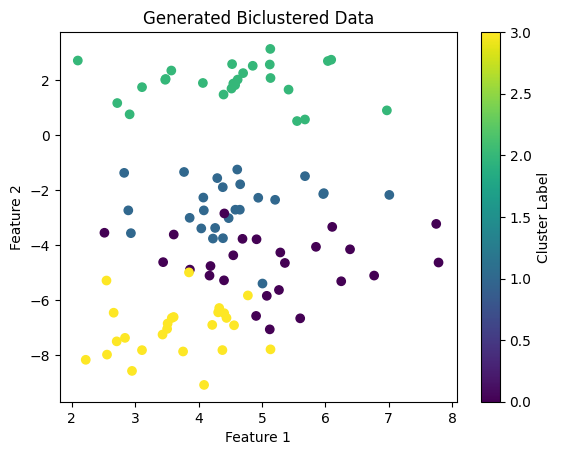

In [68]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, n_features=2,
                  random_state=509)
# plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
plt.title('Generated Biclustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()




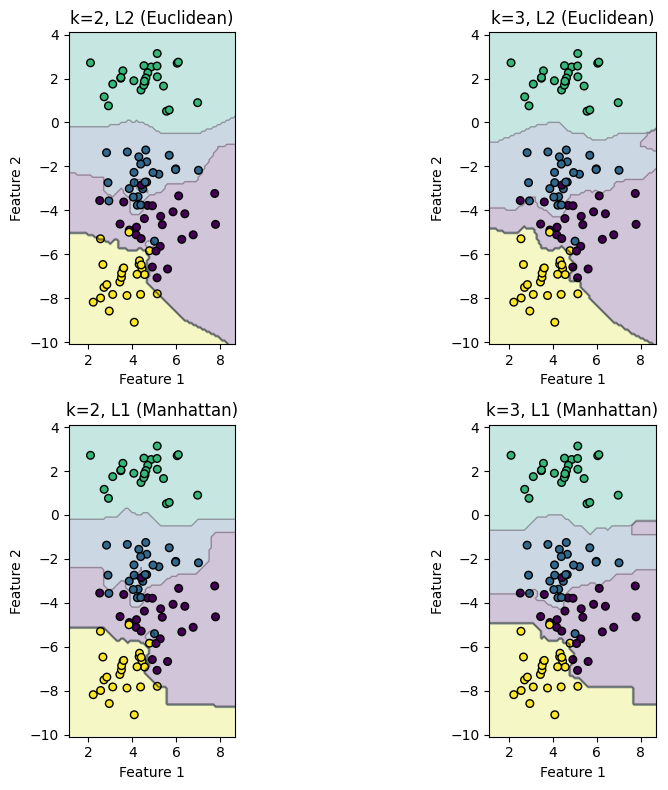

In [69]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# ---- Decision boundary helper ----
def plot_knn_boundaries(X, y, configs, h=0.1):
    # mesh over the feature space
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.ravel()

    for ax, (title, knn_kwargs) in zip(axes, configs):
        clf = KNeighborsClassifier(**knn_kwargs)
        clf.fit(X, y)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # background regions
        ax.contourf(xx, yy, Z, alpha=0.25, cmap='viridis', antialiased=True)
        # decision boundaries (optional but nice)
        ax.contour(xx, yy, Z, levels=np.unique(y), linewidths=1, colors='k', alpha=0.3)

        # training points
        sc = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
                        edgecolor='k', s=30)
        ax.set_title(title)
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

# ---- Define the four configurations: k=2,3 with L2 and L1 ----
configs = [
    ("k=2, L2 (Euclidean)", dict(n_neighbors=2, metric='minkowski', p=2)),
    ("k=3, L2 (Euclidean)", dict(n_neighbors=3, metric='minkowski', p=2)),
    ("k=2, L1 (Manhattan)", dict(n_neighbors=2, metric='minkowski', p=1)),  # or metric='manhattan'
    ("k=3, L1 (Manhattan)", dict(n_neighbors=3, metric='minkowski', p=1)),
]

plot_knn_boundaries(X, y, configs)


In [73]:
import pandas as pd
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['label'] = y

df

,feature_1,feature_2,label
0,3.859934,-3.012765,1
1,3.441267,-4.626234,0
2,4.657134,-1.790655,1
3,4.087285,-9.097082,3
4,4.610830,-1.253717,1
...,...,...,...
95,4.385438,-3.754531,1
96,5.077052,-5.852800,0
97,4.376399,-7.828510,3
98,4.548837,1.877221,2


In [74]:
df.to_csv("knn.csv", index=False)